In [1]:
import pandas as pd

# Load the data from the provided CSV file
file_path = 'Cleaned_Merged_Traffic_Weather_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its summary
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479023 entries, 0 to 479022
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  479023 non-null  float64
 1   Y                  479023 non-null  float64
 2   OBJECTID           479023 non-null  int64  
 3   EVENT_UNIQUE_ID    479023 non-null  object 
 4   OCC_DATE           479023 non-null  object 
 5   OCC_MONTH          479023 non-null  object 
 6   OCC_DOW            479023 non-null  object 
 7   OCC_YEAR           479023 non-null  int64  
 8   OCC_HOUR           479023 non-null  int64  
 9   DIVISION           479023 non-null  object 
 10  FATALITIES         479023 non-null  int64  
 11  INJURY_COLLISIONS  479023 non-null  object 
 12  FTR_COLLISIONS     479023 non-null  object 
 13  PD_COLLISIONS      479023 non-null  object 
 14  HOOD_158           479023 non-null  int64  
 15  NEIGHBOURHOOD_158  479023 non-null  object 
 16  LO

(              X             Y  OBJECTID EVENT_UNIQUE_ID    OCC_DATE OCC_MONTH  \
 0 -8.829197e+06  5.427507e+06     64597  GO-20158000005  2015-01-01   January   
 1 -8.814279e+06  5.442747e+06     64598     GO-20151843  2015-01-01   January   
 2 -8.836036e+06  5.410408e+06     64599  GO-20158000026  2015-01-01   January   
 3 -8.837294e+06  5.414551e+06     64600  GO-20158000028  2015-01-01   January   
 4 -8.853735e+06  5.409808e+06     64601  GO-20158000326  2015-01-01   January   
 
     OCC_DOW  OCC_YEAR  OCC_HOUR DIVISION  ...  BICYCLE PEDESTRIAN  Season  \
 0  Thursday      2015         0      D41  ...       NO         NO  Winter   
 1  Thursday      2015         5      D42  ...       NO         NO  Winter   
 2  Thursday      2015        14      D51  ...       NO         NO  Winter   
 3  Thursday      2015        16      D53  ...       NO         NO  Winter   
 4  Thursday      2015         1      D22  ...       NO         NO  Winter   
 
   Day Type  Rush Hour   Date/Time  

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Assuming you already have your 'data' DataFrame loaded

# Selecting relevant columns
columns = ['Season', 'Day Type', 'Rush Hour', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER', 
           'BICYCLE', 'PEDESTRIAN', 'FTR_COLLISIONS', 'PD_COLLISIONS', 'Max Temp', 'Min Temp', 
           'Mean Temp', 'Total Precip (mm)', 'INJURY_COLLISIONS']

# Preparing the data
data_selected = data[columns]
data_dummies = pd.get_dummies(data_selected.drop('INJURY_COLLISIONS', axis=1))
data_dummies['INJURY_COLLISIONS'] = LabelEncoder().fit_transform(data_selected['INJURY_COLLISIONS'])

# Splitting the data
X = data_dummies.drop('INJURY_COLLISIONS', axis=1)
y = data_dummies['INJURY_COLLISIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    'Logistic Regression': LogisticRegression(random_state=0,penalty="l2", C=1e42, solver='saga'),
    'Decision Tree': DecisionTreeClassifier(random_state=0,max_depth=7,min_samples_split=50),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Training
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_prec = precision_score(y_train, y_train_pred)
    test_prec = precision_score(y_test, y_test_pred)
    train_rec = recall_score(y_train, y_train_pred)
    test_rec = recall_score(y_test, y_test_pred)
    
    # Confusion Matrices
    train_conf = confusion_matrix(y_train, y_train_pred)
    test_conf = confusion_matrix(y_test, y_test_pred)
    
    # Storing results
    results[name] = {
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train Precision': train_prec,
        'Test Precision': test_prec,
        'Train Recall': train_rec,
        'Test Recall': test_rec,
        'Train Confusion Matrix': train_conf,
        'Test Confusion Matrix': test_conf
    }

results

{'Logistic Regression': {'Train Accuracy': 0.9929678273628458,
  'Test Accuracy': 0.9926517149477757,
  'Train Precision': 0.9915430595528005,
  'Test Precision': 0.9925849639546859,
  'Train Recall': 0.9577452741425028,
  'Test Recall': 0.9548246483059243,
  'Train Confusion Matrix': array([[288170,    382],
         [  1976,  44788]], dtype=int64),
  'Test Confusion Matrix': array([[123375,    144],
         [   912,  19276]], dtype=int64)},
 'Decision Tree': {'Train Accuracy': 0.9933435923129227,
  'Test Accuracy': 0.9929718106981567,
  'Train Precision': 0.9879898308056456,
  'Test Precision': 0.9884372453137734,
  'Train Recall': 0.9639893935505944,
  'Test Recall': 0.9612145829205468,
  'Train Confusion Matrix': array([[288004,    548],
         [  1684,  45080]], dtype=int64),
  'Test Confusion Matrix': array([[123292,    227],
         [   783,  19405]], dtype=int64)},
 'KNN': {'Train Accuracy': 0.9942472175500126,
  'Test Accuracy': 0.9926238805346991,
  'Train Precision': 0.9

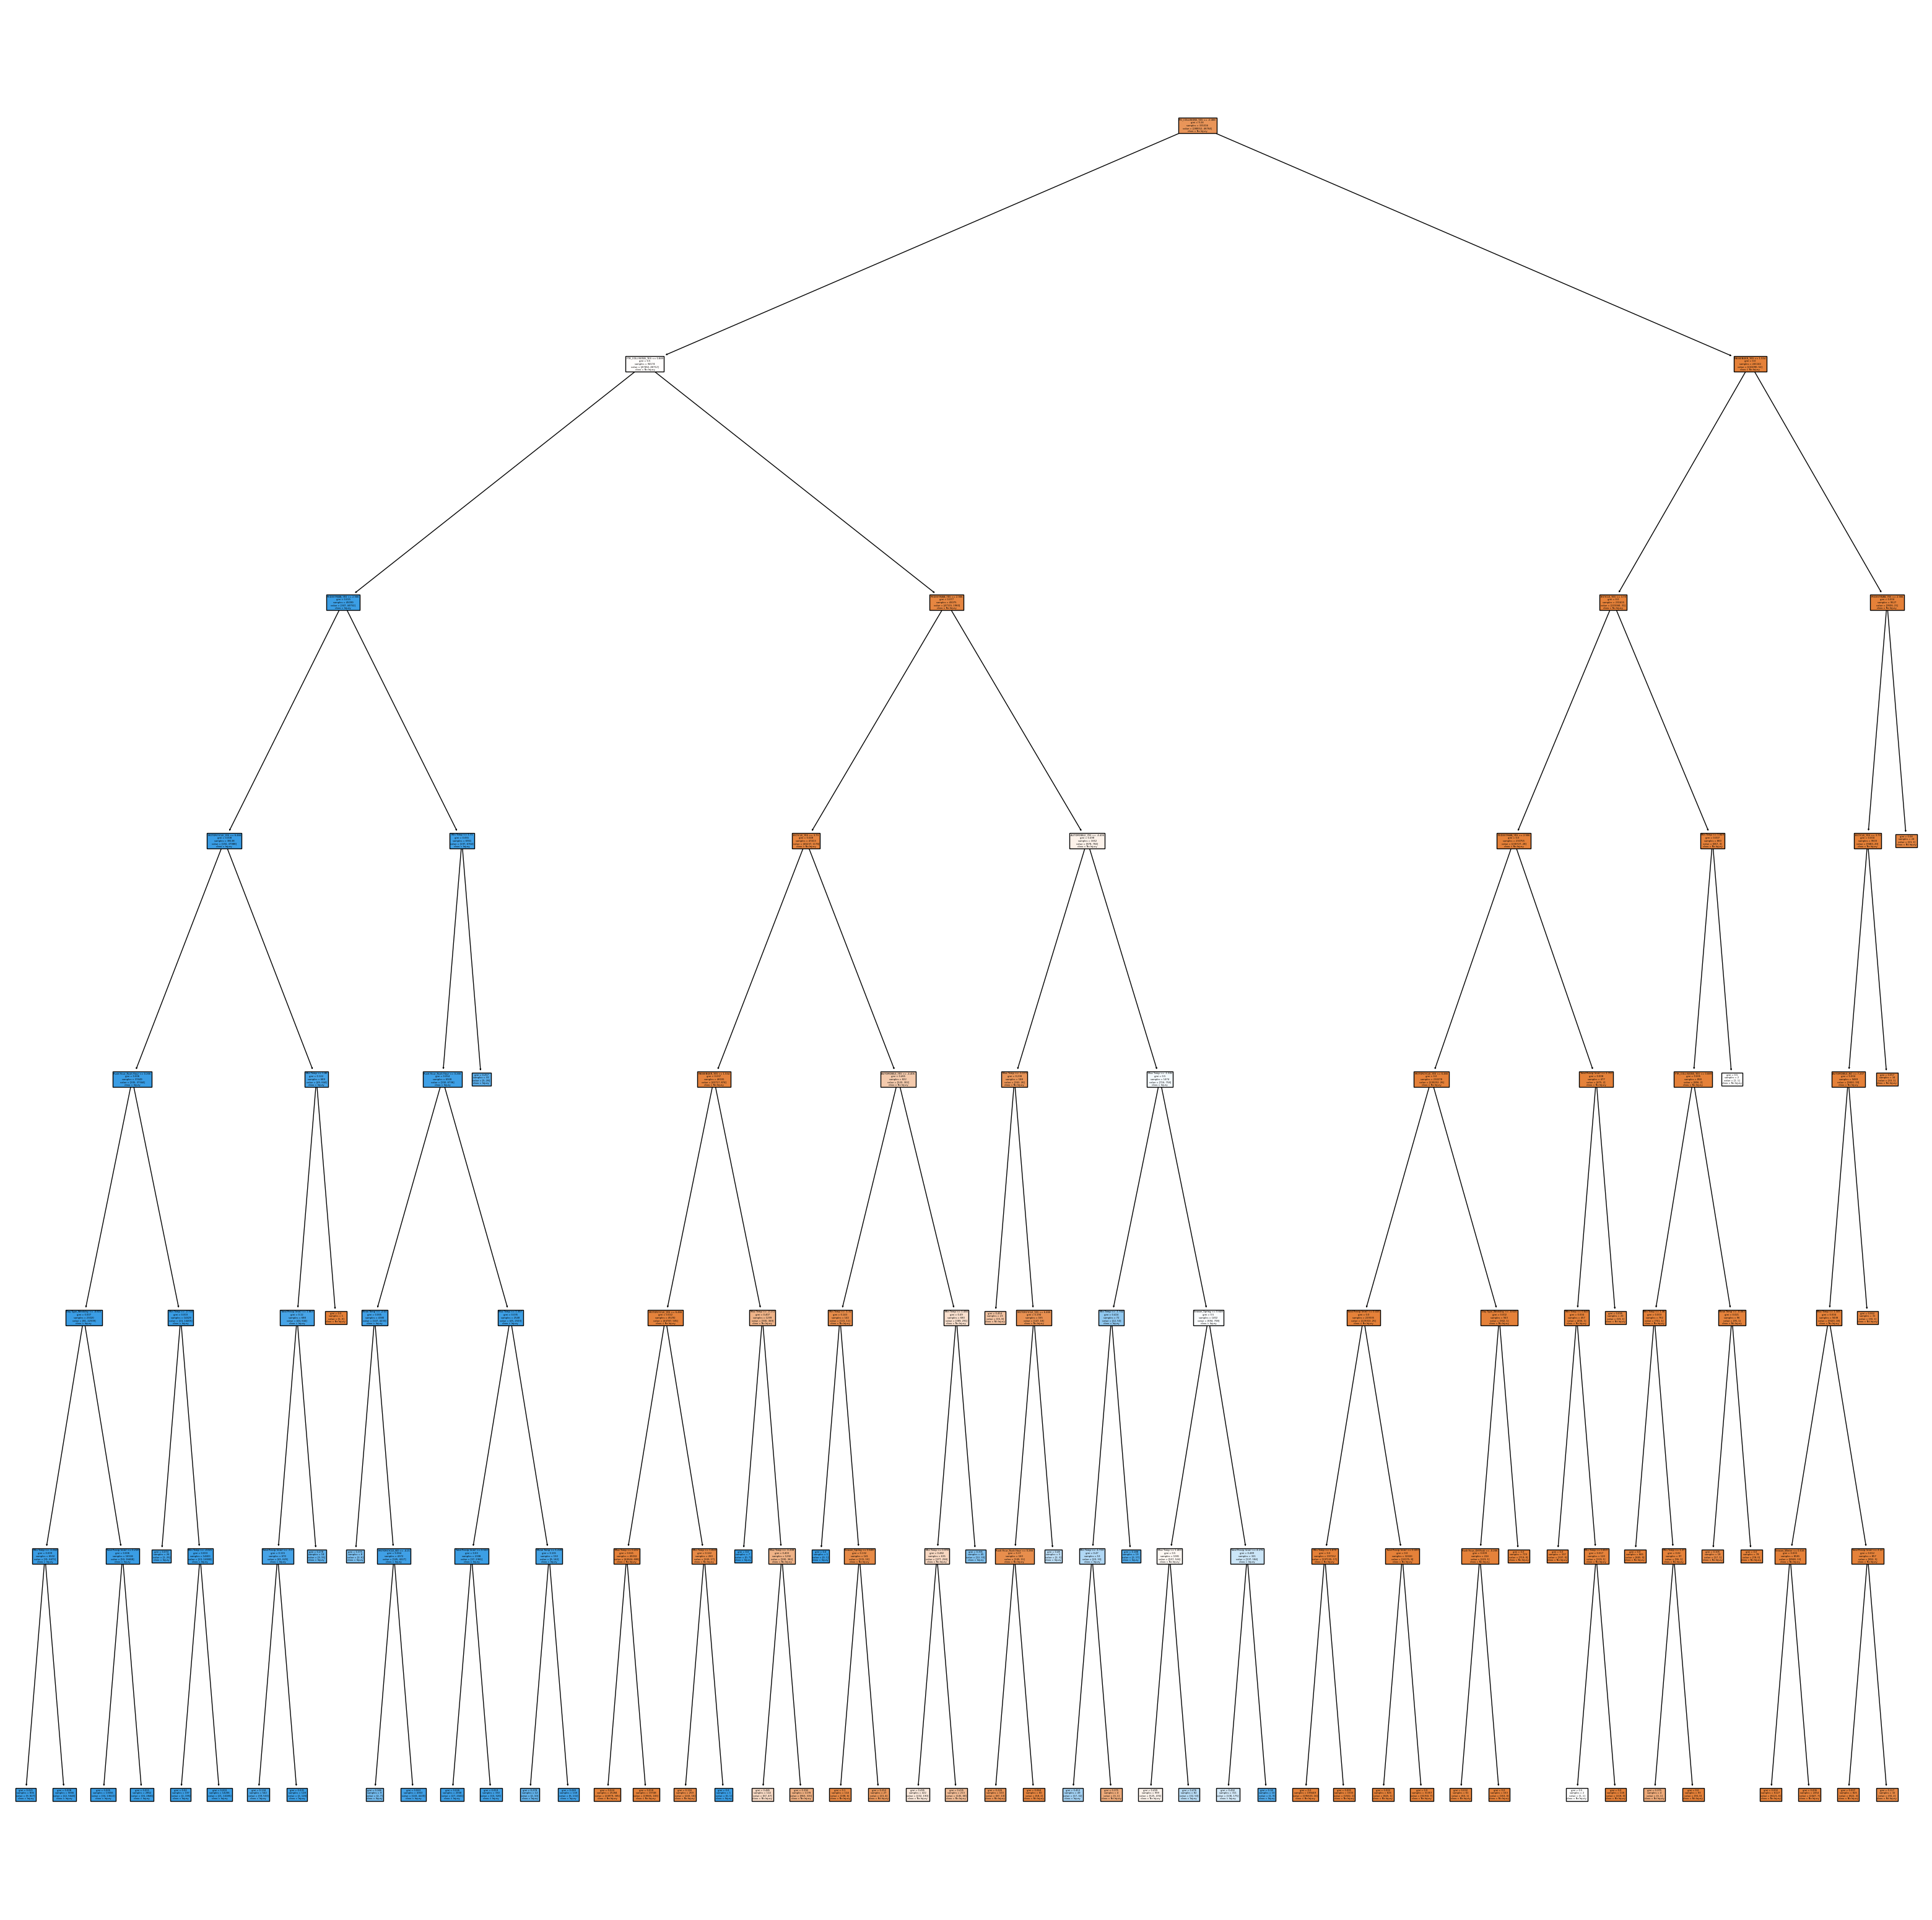

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

decision_tree_model = models['Decision Tree']
plt.figure(figsize=(40, 40))
plot_tree(decision_tree_model, filled=True, feature_names=list(X.columns), class_names=["No Injury", "Injury"])
plt.show()

In [4]:
# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(random_state=0,penalty="l2", C=1e42, solver='saga'),
    'Decision Tree': DecisionTreeClassifier(random_state=0,max_depth=7,min_samples_split=50),
    'KNN': KNeighborsClassifier()
}

# Print parameters for each model
for name, model in models.items():
    print(f"Parameters for {name}:")
    print(model.get_params())
    print()  # Adds a newline for better readability

Parameters for Logistic Regression:
{'C': 1e+42, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Parameters for Decision Tree:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}

Parameters for KNN:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}



##  Model Performance Comparison

### Accuracy
- **Logistic Regression**: 
  - Train: 99.29%
  - Test: 99.26%
- **Decision Tree**:
  - Train: 99.33%
  - Test: 99.29%
- **KNN**:
  - Train: 99.42%
  - Test: 99.26%

### Precision
- **Logistic Regression**:
  - Train: 99.15%
  - Test: 99.25%
- **Decision Tree**:
  - Train: 98.79%
  - Test: 98.84%
- **KNN**:
  - Train: 98.30%
  - Test: 97.94%

### Recall
- **Logistic Regression**:
  - Train: 95.77%
  - Test: 95.48%
- **Decision Tree**:
  - Train: 96.39%
  - Test: 96.12%
- **KNN**:
  - Train: 97.55%
  - Test: 96.78%

## Analysis and Recommendations

1. **Logistic Regression** shows high accuracy and precision in both the training and testing datasets.

2. **Decision Tree** shows high accraucy, high precision and has slightly lower recall.

3. **KNN** continues to demonstrate the highest overall accuracy and very good precision and recall. It has the lowest precision scores indicating a greater chance of idenfitying false positives.

### Best Model Selection
The **KNN** still stands out as the best model due to its superior generalization capabilities, maintaining the highest accuracy on the test set and balancing precision and recall effectively. It demonstrates reliability for predicting on new, unseen data.

- **KNN** is recommended for cases where accuracy on unseen data is critical.
- **Logistic Regression** provides a strong alternative with slightly better precision but lower recall scores.
- **Decision Tree** has shown improvement and can be considered if interpretability of the model is a priority, as it now shows less overfitting.

In conclusion, **KNN** would still be the recommended model based on these metrics, especially in applications where high accuracy and good generalization are crucial.